# Modèle de régression logistique

## Import des librairies

In [1]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('LSP_Project').getOrCreate()
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## Chargement des données

In [2]:
dataset=spark.read.csv("hdfs://localhost:9000/Dataset/us_county.csv",inferSchema=True,header=True)

In [3]:
dataset_1=spark.read.csv("hdfs://localhost:9000/Dataset/covid_us_county.csv",inferSchema=True,header=True)

In [4]:
dataset

DataFrame[fips: int, county: string, state: string, state_code: string, male: int, female: int, median_age: double, population: int, female_percentage: double, lat: double, long: double]

## Quelques observations sur les données

In [5]:
dataset.show()

+----+----------------+-------+----------+------+------+----------+----------+------------------+------------------+------------------+
|fips|          county|  state|state_code|  male|female|median_age|population| female_percentage|               lat|              long|
+----+----------------+-------+----------+------+------+----------+----------+------------------+------------------+------------------+
|1001|  Autauga County|Alabama|        AL| 26874| 28326|      37.8|     55200|51.315217391304344| 32.53492293292812|-86.64273013739468|
|1003|  Baldwin County|Alabama|        AL|101188|106919|      42.8|    208107|  51.3769359031652| 30.72747876693927|-87.72256353282204|
|1005|  Barbour County|Alabama|        AL| 13697| 12085|      39.9|     25782|46.873787914048556|31.869581438362314|-85.39320978902569|
|1007|     Bibb County|Alabama|        AL| 12152| 10375|      39.9|     22527|46.055844098193276|32.998628228925845|-87.12647507182314|
|1009|   Blount County|Alabama|        AL| 28434

In [6]:
dataset_1.show()

+----+-------+-------+-----------+------------+----------+-----+----------+------+
|fips| county|  state|        lat|        long|      date|cases|state_code|deaths|
+----+-------+-------+-----------+------------+----------+-----+----------+------+
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-22|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-23|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-24|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-25|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-26|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-27|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-28|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-29|    0|        AL|     0|
|1001|Autauga|Alabama|32.53952745|-86.64408227|2020-01-30|    0|        AL|     0|
|100

In [7]:
dataset.summary()

DataFrame[summary: string, fips: string, county: string, state: string, state_code: string, male: string, female: string, median_age: string, population: string, female_percentage: string, lat: string, long: string]

In [8]:
type(dataset)

pyspark.sql.dataframe.DataFrame

In [9]:
import pandas as pd

data=dataset.toPandas()
data.shape

(3220, 11)

In [10]:
data

,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.642730
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,-87.722564
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,-85.393210
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,-87.126475
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,-86.567380
...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Vega Baja Municipio,Puerto Rico,NA,25580,27791,40.7,53371,52.071350,18.428461,-66.397926
3216,72147,Vieques Municipio,Puerto Rico,NA,4332,4439,43.6,8771,50.609965,18.122662,-65.439095
3217,72149,Villalba Municipio,Puerto Rico,NA,11169,11824,38.8,22993,51.424347,18.128155,-66.472816
3218,72151,Yabucoa Municipio,Puerto Rico,NA,16541,17608,42.5,34149,51.562271,18.070468,-65.896311


In [11]:
data.isna().describe()

,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
count,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220


In [12]:
data.isnull().describe()

,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
count,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220


In [13]:
data.columns

Index(['fips', 'county', 'state', 'state_code', 'male', 'female', 'median_age',
       'population', 'female_percentage', 'lat', 'long'],
      dtype='object')

In [14]:
data_1=dataset_1.toPandas()

In [15]:
data_1.columns

Index(['fips', 'county', 'state', 'lat', 'long', 'date', 'cases', 'state_code',
       'deaths'],
      dtype='object')

In [16]:
data_1

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0
...,...,...,...,...,...,...,...,...,...
1215755,56045,Weston,Wyoming,43.839612,-104.567488,2021-01-15,602,WY,4
1215756,56045,Weston,Wyoming,43.839612,-104.567488,2021-01-16,602,WY,4
1215757,56045,Weston,Wyoming,43.839612,-104.567488,2021-01-17,602,WY,4
1215758,56045,Weston,Wyoming,43.839612,-104.567488,2021-01-18,602,WY,4


In [17]:
data_1.isna().sum()

fips          0
county        0
state         0
lat           0
long          0
date          0
cases         0
state_code    0
deaths        0
dtype: int64

In [18]:
data_1.isnull().sum()

fips          0
county        0
state         0
lat           0
long          0
date          0
cases         0
state_code    0
deaths        0
dtype: int64

In [19]:
data_1.index

RangeIndex(start=0, stop=1215760, step=1)

In [20]:
col=[]
for i in data_1.columns:
    print(i, data_1[i].dtype)
    if(data_1[i].dtype=='object'):
        col.append(i)

fips object
county object
state object
lat float64
long float64
date object
cases int32
state_code object
deaths int32


In [21]:
data_1[col]

,fips,county,state,date,state_code
0,1001,Autauga,Alabama,2020-01-22,AL
1,1001,Autauga,Alabama,2020-01-23,AL
2,1001,Autauga,Alabama,2020-01-24,AL
3,1001,Autauga,Alabama,2020-01-25,AL
4,1001,Autauga,Alabama,2020-01-26,AL
...,...,...,...,...,...
1215755,56045,Weston,Wyoming,2021-01-15,WY
1215756,56045,Weston,Wyoming,2021-01-16,WY
1215757,56045,Weston,Wyoming,2021-01-17,WY
1215758,56045,Weston,Wyoming,2021-01-18,WY


### Affichage des morts en fonction des cas

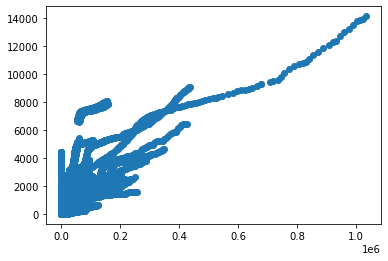

In [22]:
plt.scatter(data_1['cases'],data_1['deaths'])

### Correlaton entre quelques variables

In [23]:
data_1.corr()

,lat,long,cases,deaths
lat,1.000000,-0.721129,-0.000617,0.012629
long,-0.721129,1.000000,-0.016877,0.027553
cases,-0.000617,-0.016877,1.000000,0.772769
deaths,0.012629,0.027553,0.772769,1.000000


In [24]:
len(data_1.columns)

9

## Transformation sur les colonnes sélectionnées

In [25]:
data_3=data_1.drop(col,axis=1)
data_3

,lat,long,cases,deaths
0,32.539527,-86.644082,0,0
1,32.539527,-86.644082,0,0
2,32.539527,-86.644082,0,0
3,32.539527,-86.644082,0,0
4,32.539527,-86.644082,0,0
...,...,...,...,...
1215755,43.839612,-104.567488,602,4
1215756,43.839612,-104.567488,602,4
1215757,43.839612,-104.567488,602,4
1215758,43.839612,-104.567488,602,4


In [26]:
data_dummies=[]

In [27]:
data_2=pd.get_dummies(data_1['state_code'])
data_dummies.append(data_2)


### Transformation des catégories

In [28]:
for d in data_dummies:
    data_3=pd.concat([data_3,d],axis=1)

In [29]:
data_3=pd.concat([data_3,data_1['date']],axis=1)

In [30]:
data_3.columns

Index(['lat', 'long', 'cases', 'deaths', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'date'],
      dtype='object')

In [31]:
data_3.info

<bound method DataFrame.info of                lat        long  cases  deaths  AK  AL  AR  AZ  CA  CO  ...  \
0        32.539527  -86.644082      0       0   0   1   0   0   0   0  ...   
1        32.539527  -86.644082      0       0   0   1   0   0   0   0  ...   
2        32.539527  -86.644082      0       0   0   1   0   0   0   0  ...   
3        32.539527  -86.644082      0       0   0   1   0   0   0   0  ...   
4        32.539527  -86.644082      0       0   0   1   0   0   0   0  ...   
...            ...         ...    ...     ...  ..  ..  ..  ..  ..  ..  ...   
1215755  43.839612 -104.567488    602       4   0   0   0   0   0   0  ...   
1215756  43.839612 -104.567488    602       4   0   0   0   0   0   0  ...   
1215757  43.839612 -104.567488    602       4   0   0   0   0   0   0  ...   
1215758  43.839612 -104.567488    602       4   0   0   0   0   0   0  ...   
1215759  43.839612 -104.567488    606       4   0   0   0   0   0   0  ...   

         TN  TX  UT  VA  VT  WA

In [32]:
date = data_3

In [33]:
date.columns

Index(['lat', 'long', 'cases', 'deaths', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'date'],
      dtype='object')

### Transformation des dates

In [34]:
date['year']= data_3['date'].map(lambda x:datetime.strptime(str(x), '%Y-%m-%d'))

In [35]:
date['new_date']= date['year']

In [36]:
date['year']=date['year'].map(lambda x: x.year)

In [37]:
date['month']=date['new_date'].map(lambda x: x.month)
date['day']=date['new_date'].map(lambda x: x.day)

In [38]:
date

,lat,long,cases,deaths,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,date,year,new_date,month,day
0,32.539527,-86.644082,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2020-01-22,2020,2020-01-22,1,22
1,32.539527,-86.644082,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2020-01-23,2020,2020-01-23,1,23
2,32.539527,-86.644082,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2020-01-24,2020,2020-01-24,1,24
3,32.539527,-86.644082,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2020-01-25,2020,2020-01-25,1,25
4,32.539527,-86.644082,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2020-01-26,2020,2020-01-26,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215755,43.839612,-104.567488,602,4,0,0,0,0,0,0,...,0,0,0,0,1,2021-01-15,2021,2021-01-15,1,15
1215756,43.839612,-104.567488,602,4,0,0,0,0,0,0,...,0,0,0,0,1,2021-01-16,2021,2021-01-16,1,16
1215757,43.839612,-104.567488,602,4,0,0,0,0,0,0,...,0,0,0,0,1,2021-01-17,2021,2021-01-17,1,17
1215758,43.839612,-104.567488,602,4,0,0,0,0,0,0,...,0,0,0,0,1,2021-01-18,2021,2021-01-18,1,18


In [39]:
date=date.drop(['date','new_date'],axis=1)

In [40]:
date.columns

Index(['lat', 'long', 'cases', 'deaths', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'year', 'month',
       'day'],
      dtype='object')

## Séparation en données d'entraînement et de test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(date[['lat', 'long', 'cases', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'year', 'month',
       'day']], date['deaths'], test_size=0.33, random_state=51)

## Normalisation des données

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Std=scaler.fit_transform(X_train)

## Entrainement du modèle RandomForestRegressor

In [43]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_Std, y_train)

RandomForestRegressor(random_state=0)

## Evaluation du modèle sur les données d'entraînement

In [44]:
regr.predict(scaler.fit_transform(X_test))

array([1.84, 0.  , 0.1 , ..., 4.4 , 0.  , 0.  ])

In [45]:
regr.score(scaler.fit_transform(X_test),y_test)

0.9900793987016415

## Affichage des morts en fonctions des cas


### En Orange on a le résultat du modèle et en bleu le résultat réel

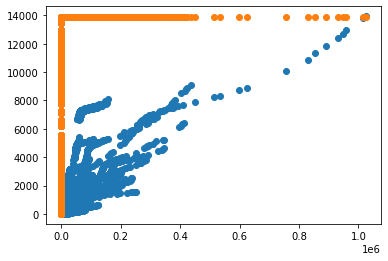

In [49]:
plt.scatter(X_test['cases'],y_test)
plt.scatter(X_test['cases'],regr.predict(X_test))

## Enregistrement du modèle et sauvegarde

In [56]:
import pickle
Project_path="home/student/LSP_Project/"
model_path = Project_path + "Models/regr.pickle"
vectorizer_path = Project_path + "Models/scaler.pickle"
model, vectorizer_model = regr,scaler
pickle.dump(model, open('model_path.pickle', 'wb'))
pickle.dump(vectorizer_model, open('vectorizer_path.pickle', "wb"))


In [57]:
model = pickle.load(open('model_path.pickle', 'rb'))